In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Customer data/BankCustomerData.csv')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Customer
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42634,21,student,single,secondary,no,2488,no,no,telephone,12,jan,661,2,92,1,success,yes
42635,87,retired,married,primary,no,2190,no,no,telephone,12,jan,512,2,-1,0,unknown,yes
42636,34,blue-collar,married,primary,no,6718,no,no,cellular,13,jan,278,4,97,1,other,no
42637,22,student,single,secondary,no,254,no,no,cellular,13,jan,143,2,-1,0,unknown,yes


In [ ]:
print('Duplicate values in the bank-full dataset are: ', data.duplicated().sum())

Duplicate values in the bank-full dataset are:  0


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

(42639, 17)

In [ ]:
print(data.isnull().sum().sum())

0


In [ ]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Customer     0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42639 entries, 0 to 42638
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        42639 non-null  int64 
 1   job        42639 non-null  object
 2   marital    42639 non-null  object
 3   education  42639 non-null  object
 4   default    42639 non-null  object
 5   balance    42639 non-null  int64 
 6   housing    42639 non-null  object
 7   loan       42639 non-null  object
 8   contact    42639 non-null  object
 9   day        42639 non-null  int64 
 10  month      42639 non-null  object
 11  duration   42639 non-null  int64 
 12  campaign   42639 non-null  int64 
 13  pdays      42639 non-null  int64 
 14  previous   42639 non-null  int64 
 15  poutcome   42639 non-null  object
 16  Customer   42639 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = data.copy()

Text(0.5, 1.0, 'Education type vs Count')

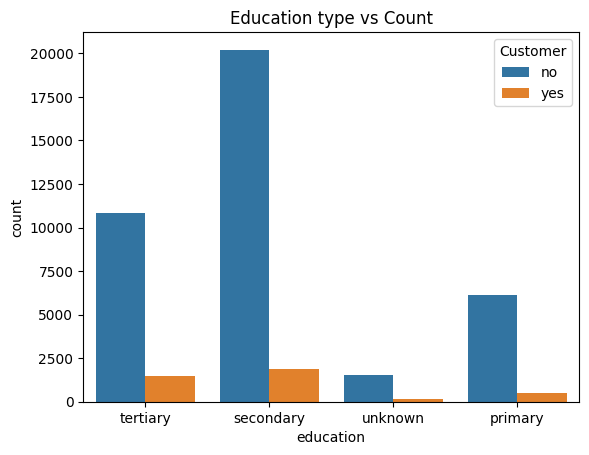

In [ ]:
sns.countplot(x="education",data=df, hue = "Customer")
plt.title("Education type vs Count")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'management'),
  Text(1, 0, 'technician'),
  Text(2, 0, 'entrepreneur'),
  Text(3, 0, 'blue-collar'),
  Text(4, 0, 'unknown'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'admin.'),
  Text(7, 0, 'services'),
  Text(8, 0, 'self-employed'),
  Text(9, 0, 'unemployed'),
  Text(10, 0, 'housemaid'),
  Text(11, 0, 'student')])

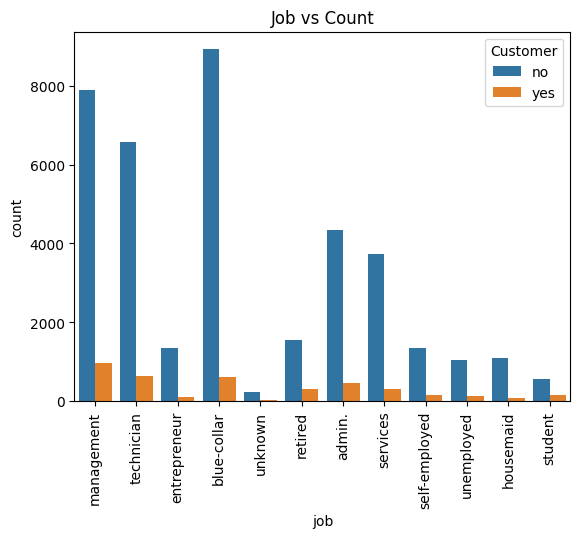

In [ ]:
sns.countplot(x="job", data = df, hue ="Customer")
plt.title("Job vs Count")
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Martial Status vs Count')

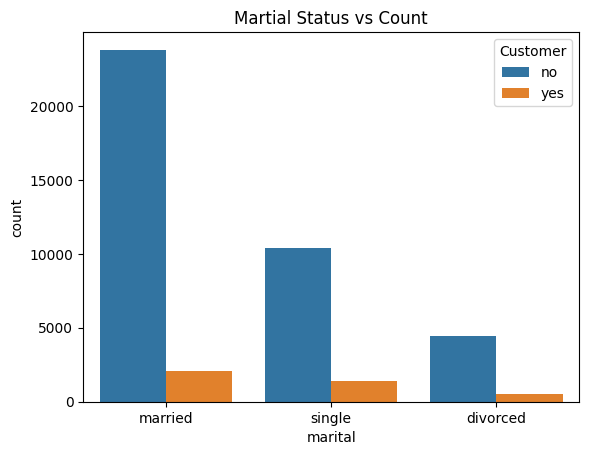

In [ ]:
sns.countplot(x="marital", data = df,hue ="Customer")
plt.title("Martial Status vs Count")

Text(0.5, 1.0, 'personal loan vs Count')

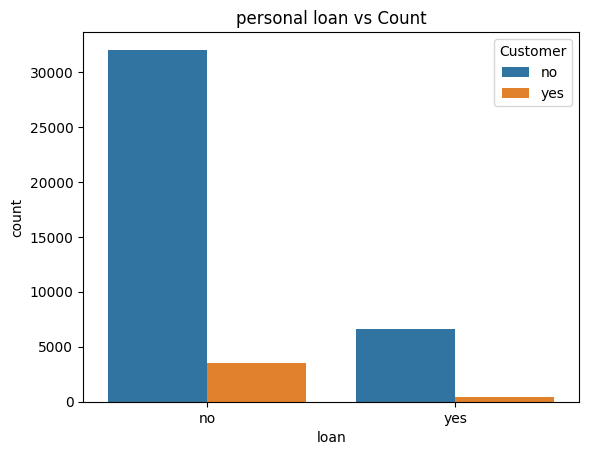

In [ ]:
sns.countplot(x="loan", data = df, hue ="Customer")
plt.title("personal loan vs Count")

<ipython-input-42-4e0a91d102dd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<Axes: >

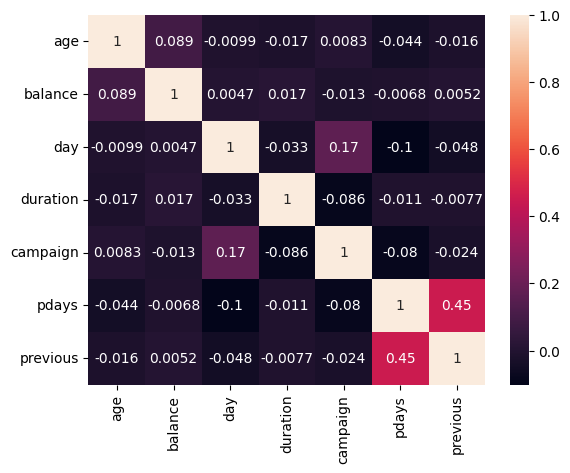

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot =True)

In [ ]:
#data for the purpose of encoding
df = pd.concat([df], ignore_index=True)
df.shape

(42639, 17)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [ ]:
le = preprocessing.LabelEncoder()

In [ ]:
#data for the purpose of encoding
df = pd.concat([df], ignore_index=True)
df.shape

(42639, 17)

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Customer
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df = pd.get_dummies(df,columns = ['job','marital','education','default','housing','month','loan','contact','poutcome'], drop_first = True)
df.head()

,age,balance,day,duration,campaign,pdays,previous,Customer,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,no,0,0,...,1,0,0,0,0,0,1,0,0,1
1,44,29,5,151,1,-1,0,no,0,0,...,1,0,0,0,0,0,1,0,0,1
2,33,2,5,76,1,-1,0,no,0,1,...,1,0,0,0,1,0,1,0,0,1
3,47,1506,5,92,1,-1,0,no,1,0,...,1,0,0,0,0,0,1,0,0,1
4,33,1,5,198,1,-1,0,no,0,0,...,1,0,0,0,0,0,1,0,0,1


In [ ]:
df['Customer'].replace('yes', 1, inplace=True)
df['Customer'].replace('no', 0, inplace=True)
df.head()

,age,balance,day,duration,campaign,pdays,previous,Customer,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,1,0,0,0,1,0,1,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1


In [ ]:
target = df['Customer']
df = df.drop('Customer',axis = 1)
columns = df.columns
scaler = MinMaxScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df,columns=[columns])
df.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_may,month_nov,month_oct,month_sep,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,0.519481,0.092259,0.133333,0.053070,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.337662,0.073067,0.133333,0.030704,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.194805,0.072822,0.133333,0.015453,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.376623,0.086476,0.133333,0.018707,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.194805,0.072812,0.133333,0.040260,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
y = np.array(target)
X = df

In [ ]:
BestFeatures = SelectKBest(score_func=chi2, k=10)
fit = BestFeatures.fit(X,y)

In [ ]:
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

In [ ]:
f_Scores = pd.concat([df_columns,df_scores],axis=1)               # feature scores
f_Scores.columns = ['Specs','Score'] 

In [ ]:
f_Scores

,Specs,Score
0,"(age,)",0.210683
1,"(balance,)",0.823236
2,"(day,)",4.085821
3,"(duration,)",394.041452
4,"(campaign,)",12.788566
5,"(pdays,)",21.665815
6,"(previous,)",1.727698
7,"(job_blue-collar,)",94.699973
8,"(job_entrepreneur,)",7.837730
9,"(job_housemaid,)",8.143392


In [ ]:
y = np.array(target)
X = df

#Splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 1)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
X_train.shape

(31979, 42)

In [ ]:
X_test.shape

(10660, 42)

In [ ]:
f_score=chi2(X_train,y_train)

In [ ]:
f_score

(array([9.19468847e-02, 4.89904832e-01, 2.25974619e+00, 3.00515391e+02,
        1.00270598e+01, 1.43665766e+01, 1.15650677e+00, 8.24977898e+01,
        9.63246410e+00, 5.11186977e+00, 2.32504997e+01, 1.12375406e+02,
        8.74385045e-01, 1.06440486e+01, 1.02448510e+02, 4.43583021e-01,
        3.76811803e+00, 1.68731528e-01, 4.15672908e+01, 7.58111181e+01,
        1.73417320e+01, 7.15856356e+01, 8.37247939e-01, 6.91627864e+00,
        1.35727946e+02, 1.12805682e-01, 2.45445752e+02, 8.59657481e+00,
        2.11293935e+01, 3.16191430e+01, 4.69402746e-01, 3.30529747e+02,
        1.36026268e+02, 1.84052711e-02, 5.82908036e+02, 2.53162707e+02,
        6.47473659e+01, 2.26455744e+00, 3.11126187e+02, 2.36414095e+00,
        1.18898877e+03, 2.89629644e+01]),
 array([7.61716533e-001, 4.83969760e-001, 1.32775821e-001, 2.54381382e-067,
        1.54257074e-003, 1.50449261e-004, 2.82191186e-001, 1.05788358e-019,
        1.91167964e-003, 2.37626976e-002, 1.42213496e-006, 2.95673837e-026,
        3.

In [ ]:
f_score[1]

array([7.61716533e-001, 4.83969760e-001, 1.32775821e-001, 2.54381382e-067,
       1.54257074e-003, 1.50449261e-004, 2.82191186e-001, 1.05788358e-019,
       1.91167964e-003, 2.37626976e-002, 1.42213496e-006, 2.95673837e-026,
       3.49744196e-001, 1.10425675e-003, 4.42726561e-024, 5.05398134e-001,
       5.22383772e-002, 6.81241608e-001, 1.13882785e-010, 3.12138610e-018,
       3.12253798e-005, 2.65482345e-017, 3.60185050e-001, 8.54145432e-003,
       2.28830314e-031, 7.36972241e-001, 2.55471631e-055, 3.36795843e-003,
       4.29292595e-006, 1.87571437e-008, 4.93262062e-001, 7.36899180e-074,
       1.96908211e-031, 8.92085305e-001, 8.74029981e-129, 5.30833190e-057,
       8.51433629e-016, 1.32364020e-001, 1.24134867e-069, 1.24152241e-001,
       1.50784319e-260, 7.37753983e-008])

In [ ]:
pvalues=pd.Series(f_score[1])
pvalues.index=X_train.columns

In [ ]:
pvalues

age                     7.617165e-01
balance                 4.839698e-01
day                     1.327758e-01
duration                2.543814e-67
campaign                1.542571e-03
pdays                   1.504493e-04
previous                2.821912e-01
job_blue-collar         1.057884e-19
job_entrepreneur        1.911680e-03
job_housemaid           2.376270e-02
job_management          1.422135e-06
job_retired             2.956738e-26
job_self-employed       3.497442e-01
job_services            1.104257e-03
job_student             4.427266e-24
job_technician          5.053981e-01
job_unemployed          5.223838e-02
job_unknown             6.812416e-01
marital_married         1.138828e-10
marital_single          3.121386e-18
education_secondary     3.122538e-05
education_tertiary      2.654823e-17
education_unknown       3.601850e-01
default_yes             8.541454e-03
housing_yes             2.288303e-31
month_aug               7.369722e-01
month_dec               2.554716e-55
m

In [ ]:
pvalues.sort_values(ascending=False)

month_nov               8.920853e-01
age                     7.617165e-01
month_aug               7.369722e-01
job_unknown             6.812416e-01
job_technician          5.053981e-01
month_jun               4.932621e-01
balance                 4.839698e-01
education_unknown       3.601850e-01
job_self-employed       3.497442e-01
previous                2.821912e-01
day                     1.327758e-01
contact_telephone       1.323640e-01
poutcome_other          1.241522e-01
job_unemployed          5.223838e-02
job_housemaid           2.376270e-02
default_yes             8.541454e-03
month_feb               3.367958e-03
job_entrepreneur        1.911680e-03
campaign                1.542571e-03
job_services            1.104257e-03
pdays                   1.504493e-04
education_secondary     3.122538e-05
month_jan               4.292926e-06
job_management          1.422135e-06
poutcome_unknown        7.377540e-08
month_jul               1.875714e-08
marital_married         1.138828e-10
l

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
from keras.engine import sequential

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from tensorflow import keras

In [ ]:
from keras.engine import sequential

In [ ]:
ann= Sequential()

In [ ]:
ann.add(Dense(units= 16, activation = 'relu', input_dim=42)) 

ann.add(Dense(units=8, activation='relu'))
ann.add(Dense(units=6, activation='relu'))
ann.add(Dense(units=1, activation='sigmoid'))

In [ ]:
ann.compile (
    optimizer='Adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history=ann.fit(X_train, y_train, batch_size=10, epochs=10,validation_data=( X_test, y_test))

Epoch 1/10
3198/3198 [==============================] - 10s 3ms/step - loss: 0.2647 - accuracy: 0.9043 - val_loss: 0.2122 - val_accuracy: 0.9148
Epoch 2/10
3198/3198 [==============================] - 8s 3ms/step - loss: 0.1997 - accuracy: 0.9156 - val_loss: 0.1909 - val_accuracy: 0.9192
Epoch 3/10
3198/3198 [==============================] - 9s 3ms/step - loss: 0.1927 - accuracy: 0.9165 - val_loss: 0.1868 - val_accuracy: 0.9181
Epoch 4/10
3198/3198 [==============================] - 9s 3ms/step - loss: 0.1892 - accuracy: 0.9177 - val_loss: 0.1830 - val_accuracy: 0.9201
Epoch 5/10
3198/3198 [==============================] - 7s 2ms/step - loss: 0.1863 - accuracy: 0.9182 - val_loss: 0.1845 - val_accuracy: 0.9193
Epoch 6/10
3198/3198 [==============================] - 8s 3ms/step - loss: 0.1842 - accuracy: 0.9182 - val_loss: 0.1850 - val_accuracy: 0.9205
Epoch 7/10
3198/3198 [==============================] - 7s 2ms/step - loss: 0.1831 - accuracy: 0.9190 - val_loss: 0.1815 - val_accuracy

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


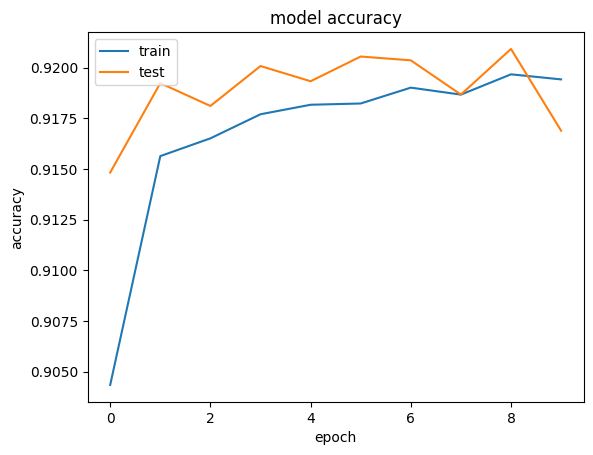

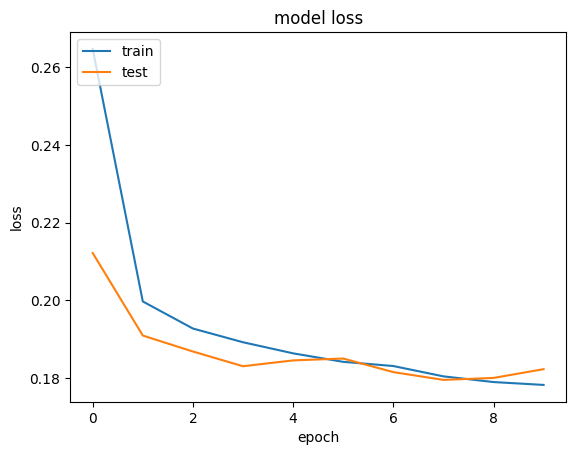

In [ ]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
X_test

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_may,month_nov,month_oct,month_sep,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
23365,0.506494,0.089681,0.866667,0.014640,0.064516,0.000000,0.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
27807,0.142857,0.074501,0.900000,0.060797,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19979,0.194805,0.075600,0.233333,0.019723,0.048387,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
271,0.285714,0.072803,0.133333,0.195608,0.000000,0.000000,0.000000,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4369,0.337662,0.075173,0.600000,0.017690,0.064516,0.000000,0.000000,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17859,0.441558,0.088655,0.966667,0.028874,0.129032,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2795,0.363636,0.128048,0.433333,0.063237,0.016129,0.000000,0.000000,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
39295,0.181818,0.078069,0.566667,0.001627,0.048387,0.521415,0.007273,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
616,0.168831,0.073348,0.166667,0.079097,0.000000,0.000000,0.000000,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


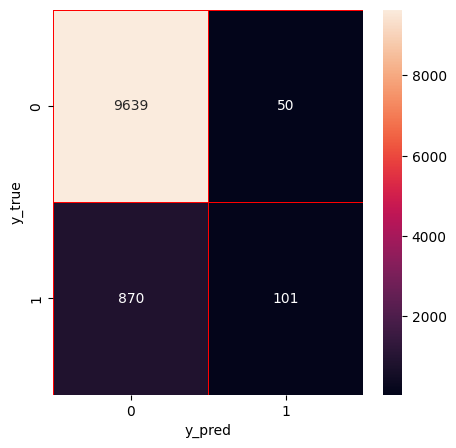

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

ann = SVC(random_state=0)
ann.fit(X_train, y_train)
SVC(random_state=0)
predictions = ann.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=ann.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=ann.classes_)
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show() 

In [ ]:
cm = confusion_matrix(y_test,predictions)
print(cm)

[[9639   50]
 [ 870  101]]


In [ ]:
acc = accuracy_score(y_test,predictions)
print("Accuracy : ",round(acc*100,2))

Accuracy :  91.37


In [ ]:
np.mean(predictions==y_test)

0.9136960600375235

In [ ]:
X_test

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_may,month_nov,month_oct,month_sep,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
23365,0.506494,0.089681,0.866667,0.014640,0.064516,0.000000,0.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
27807,0.142857,0.074501,0.900000,0.060797,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19979,0.194805,0.075600,0.233333,0.019723,0.048387,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
271,0.285714,0.072803,0.133333,0.195608,0.000000,0.000000,0.000000,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4369,0.337662,0.075173,0.600000,0.017690,0.064516,0.000000,0.000000,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17859,0.441558,0.088655,0.966667,0.028874,0.129032,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2795,0.363636,0.128048,0.433333,0.063237,0.016129,0.000000,0.000000,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
39295,0.181818,0.078069,0.566667,0.001627,0.048387,0.521415,0.007273,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
616,0.168831,0.073348,0.166667,0.079097,0.000000,0.000000,0.000000,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
prediction =ann.predict(X_test)
prediction = [1 if y>0.5 else 0 for y in prediction] #list
prediction

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
len(prediction)

10660

In [ ]:
type(prediction)

list

In [ ]:
type(y_test)

numpy.ndarray

In [ ]:
import numpy as np
import pandas as pd
import pandas.util.testing as tm

<ipython-input-86-ef2b27416eee>:3: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
pred = pd.DataFrame(prediction)

In [ ]:
type(pred)

pandas.core.frame.DataFrame

In [ ]:
pred = pred.values

In [ ]:
total = 0
correct = 0
wrong =0

for i in range(len(pred)):
    total = total+1
    if(y_test[i]== pred[i]):
      correct = correct+1
    else:
       wrong = wrong+1
print('Total = ' + str(total))
print('Correct = ' + str(correct) + ' - Parcentage correct: ' + str(round((correct/total)*100, 2))+'%')
print('Wrong = ' + str(wrong) + ' Parcentage wrong: ' + str(round((wrong/total)*100, 2)) + '%')

Total = 10660
Correct = 9740 - Parcentage correct: 91.37%
Wrong = 920 Parcentage wrong: 8.63%


In [ ]:
len(X_test)

10660

In [ ]:
input1 = X_test.iloc[[8528]]
input1

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_may,month_nov,month_oct,month_sep,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
14425,0.220779,0.072803,0.433333,0.093534,0.032258,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:

input1.shape

(1, 42)

In [ ]:
prediction1 = ann.predict(input1)
prediction1

array([0])

In [ ]:
prediction1 = ['1' if prediction1>0.5 else '0' for y in prediction1]
prediction1

['0']